**PHÂN LOẠI TIN NHẮN SMS: TIN NHẮN RÁC (SPAM) HOẶC KHÔNG (HAM)**

**Bước 1. Chuẩn bị dữ liệu**

In [1]:
import pandas as pd
import os

Path=os.getcwd() + "\\Data\\spam.csv"
data = pd.read_csv(Path, encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
#Xóa các cột dữ liệu không sử dụng
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

#Đổi tên cột v1 là "label", cột v2 là "text"
data.columns = ['label', 'text']

data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#Thống kê số dòng, số cột của dữ liệu
data.shape

(5572, 2)

In [4]:
#Kiểm tra dữ liệu có bị lỗi hay không
#isna(): phương thức kiểm tra dữ liệu có bị rỗng (giá trị #aN)

data.isna().sum()

label    0
text     0
dtype: int64

<Axes: >

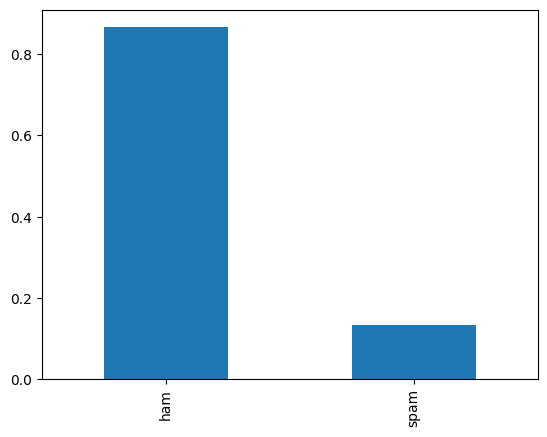

In [5]:
#Thống kê dữ liệu được phân bố trong các nhãn
data['label'].value_counts(normalize = True).plot.bar()

**Bước 2. Tiền xử lý văn bản**

In [6]:
# download nltk
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Tải thư viện nltk
# nltk.download('all')

lemmatizer = WordNetLemmatizer()
corpus = []
text = list(data['text'])

for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])   #Xóa tất cả các ký tự đặc biệt
    r = r.lower()                           #Chuyển sang chữ thường
    r = r.split()                           #Tách từ
    r = [word for word in r if word not in stopwords.words('english')] #Xóa stopwords
    r = [lemmatizer.lemmatize(word) for word in r]  #Chuẩn hóa từ
    r = ' '.join(r)
    corpus.append(r)

data['text'] = corpus
data.head()

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


**Bước 3. Trích xuất đặc trưng văn bản**

In [7]:
X = data['text']
y = data['label']

# Chia dữ liệu theo tỷ lệ: 66% train - 33% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (3733,)
Testing Data :  (1839,)


In [8]:
#Trích xuất đặc trưng văn bản bằng Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

#Kích thước của ma trận vector đặc trưng
X_train_cv.shape

(3733, 5698)

**Bước 4. Xây dựng mô hình học máy và đánh giá**

In [9]:
# Huấn luyện dữ liệu bằng mô hình hồi quy tuyến tính (Logistic Regression)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_cv, y_train)

X_test_cv = cv.transform(X_test)

In [10]:
# Đánh giá mô hình bằng Confusion matrix (ma trận nhầm lẫn)
import pandas as pd
from sklearn import metrics

# Dự đoán mô hình
y_pred = model.predict(X_test_cv)

df = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1600,2
spam,31,206


In [11]:
#Độ chính xác của mô hình
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

accuracy

0.9820554649265906

In [12]:

from sklearn.metrics import classification_report
my_tags = ['spam','ham']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1602
        spam       0.99      0.87      0.93       237

    accuracy                           0.98      1839
   macro avg       0.99      0.93      0.96      1839
weighted avg       0.98      0.98      0.98      1839

